This is a sanity check where we do spacetime error correction on the repetition code.

In [243]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time
from pymatching import Matching
import json
import networkx as nx

def plotter(idx_list, color, marker="o"):
    # for idx in (idx_list):
    for idx, coords in enumerate(idx_list):
        # print(idx, idx_list[f"{idx}"])
        x, y = coords
        # x, y = idx_list[idx]
        plt.plot(x,y,marker= marker,markersize=10,markerfacecolor="None",markeredgecolor=color)
        plt.text(x,y,idx)

[[1. 0. 0. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1.]]


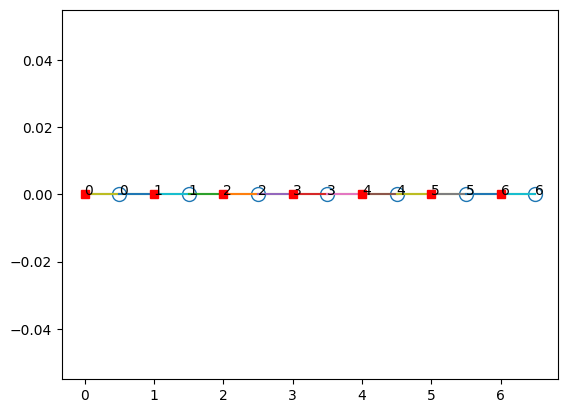

In [360]:
d = 7

qubit_coords = []
i_y = 0
for i_x in range(d):
    qubit_coords.append( ( i_x + 0.5, i_y ) )

 
qubit_idx = {}
for idx, coords in enumerate(qubit_coords):
    qubit_idx[f"{coords}"] = idx

plotter(qubit_coords, color="C0")
# print(qubit_idx)

num_q = len(qubit_coords)
num_s = d
s_idx = 0
Smat = np.zeros(( num_s, num_q))
Smat_idx = {}
i_y = 0
for i_x in range(d):
    Smat_idx[f"({i_x}, {i_y})"] = s_idx
    qvec = [( i_x + 0.5 , i_y), ( (i_x - 0.5)%d, i_y)]
    # smat.append(qvec)
    for q in qvec:
        Smat[s_idx, qubit_idx[f"{q}"]] = 1
        plt.plot([i_x,q[0]],[i_y,q[1]])
    plt.plot(i_x,i_y, "rs")
    plt.text(i_x,i_y,s_idx)
    s_idx += 1

print(Smat)
# # for i in range(Smat.shape[0]):
# #     print(i, np.argwhere(Smat[i,:])[:,0])
    
# # print(qubit_idx)
# # qubit_bdy = [qubit_idx[f"({d}, {i_y+0.5})"] for i_y in range(dy-1)]
# qubit_bdy = [qubit_idx[f"({d+0.5}, {i_y})"] for i_y in range(dy)]
# S_bdy = [Smat_idx[f"({d}, {i_y})"] for i_y in range(dy)]
# print(qubit_bdy)
# print(S_bdy)

# qubit_logical = [qubit_idx[f"({0.5}, {i_y})"] for i_y in range(dy)]
# print(qubit_logical)
# logicals = np.zeros(num_q, dtype = np.uint8)
# logicals[qubit_logical] = 1

[4 5]
[4 5]


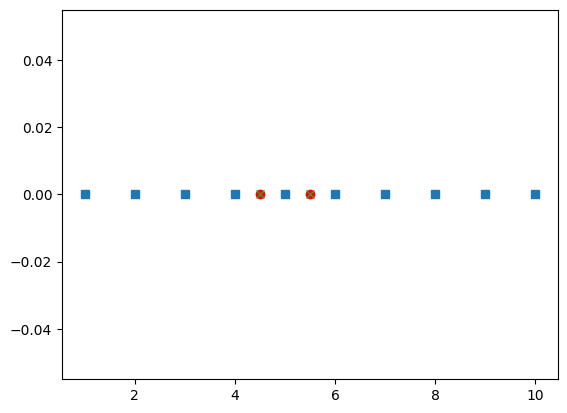

In [41]:
p_err =  0.2
weights = np.ones(num_q) * np.log((1-p_err)/p_err)
matching_x = Matching(Smat,spacelike_weights=weights)

i_y = 0
for i_x in range(1,d):
    plt.plot(i_x,i_y, "s", color = "C0")

# pauli = [0,1,2,3] # I X Z Y
# # err_instance = np.array(random.choices(pauli, [1-p_err,p_err/3,p_err/3,p_err/3], k=num_q))
# # x_err = np.argwhere(err_instance==1)[:,0]
err_inst = np.random.rand(num_q)
err_idx = np.argwhere( err_inst < 2*p_err/ 3 )[:,0]
for q in err_idx:
    plt.plot(qubit_coords[q][0],qubit_coords[q][1],"ro")
err_vec = np.zeros(num_q)
err_vec[err_idx] = 1
syndrome = (Smat@ err_vec) % 2
recovery_x = matching_x.decode(syndrome)

print(err_idx)
idx_recovery = np.argwhere(recovery_x>0)[:,0]

for q in idx_recovery:
    plt.plot(qubit_coords[q][0],qubit_coords[q][1],"x", color="C2")

print(idx_recovery)


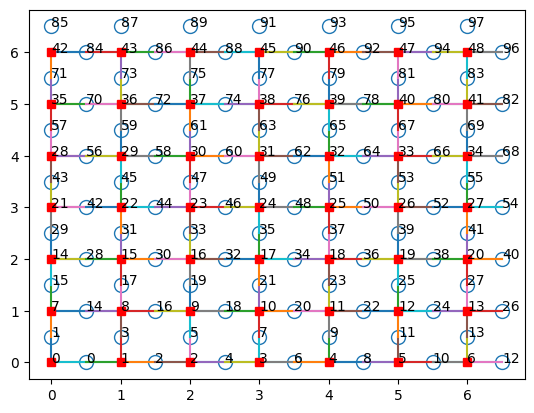

In [361]:
# d = 4
dx = d
dy = d 

qubit_coords_spacetime = []
for i_y in range(dy):
    for i_x in range(dx):
        # if i_y == dy - 1:
        #     qubit_coords_spacetime.append( ( i_x + 0.5, i_y ) )
        # else:
        qubit_coords_spacetime.append( ( i_x + 0.5, i_y ) )
        qubit_coords_spacetime.append( ( i_x, i_y + 0.5 ) )

 
qubit_idx_spacetime = {}
for idx, coords in enumerate(qubit_coords_spacetime):
    qubit_idx_spacetime[f"{coords}"] = idx

plotter(qubit_coords_spacetime, color="C0")
# print(qubit_idx)

num_q_spacetime = len(qubit_coords_spacetime)
# num_q_spacetime = 2* dx* dy
num_s = dx * dy
s_idx = 0
# smat = []
Smat_spacetime = np.zeros(( num_s, num_q_spacetime))
Smat_idx_spacetime = {}
for i_y in range(dy):
    for i_x in range(dx):
        Smat_idx_spacetime[f"({i_x}, {i_y})"] = s_idx
        if i_y == 0 :
            qvec = [(i_x + 0.5, i_y), ( (i_x - 0.5)%dx, i_y), (i_x, i_y + 0.5)]
            # smat.append(qvec)
        elif i_y == dy - 1 :
            qvec = [(i_x + 0.5, i_y), ( (i_x - 0.5)%dx, i_y), (i_x, i_y - 0.5)]
            # smat.append(qvec)
        else:
            qvec = [(i_x + 0.5, i_y), ( (i_x - 0.5)%dx, i_y), (i_x, i_y - 0.5), (i_x, i_y + 0.5)]
            # smat.append(qvec)
        for q in qvec:
            Smat_spacetime[s_idx, qubit_idx_spacetime[f"{q}"]] = 1
            plt.plot([i_x,q[0]],[i_y,q[1]])
        plt.plot(i_x,i_y, "rs")
        plt.text(i_x,i_y,s_idx)
        s_idx += 1

# print(smat)
# # for i in range(Smat.shape[0]):
# #     print(i, np.argwhere(Smat[i,:])[:,0])
    
# # print(qubit_idx)
# # qubit_bdy = [qubit_idx[f"({d}, {i_y+0.5})"] for i_y in range(dy-1)]
# qubit_bdy = [qubit_idx[f"({d+0.5}, {i_y})"] for i_y in range(dy)]
# S_bdy = [Smat_idx[f"({d}, {i_y})"] for i_y in range(dy)]
# print(qubit_bdy)
# print(S_bdy)

# qubit_logical = [qubit_idx[f"({0.5}, {i_y})"] for i_y in range(dy)]
# print(qubit_logical)
# logicals = np.zeros(num_q, dtype = np.uint8)
# logicals[qubit_logical] = 1

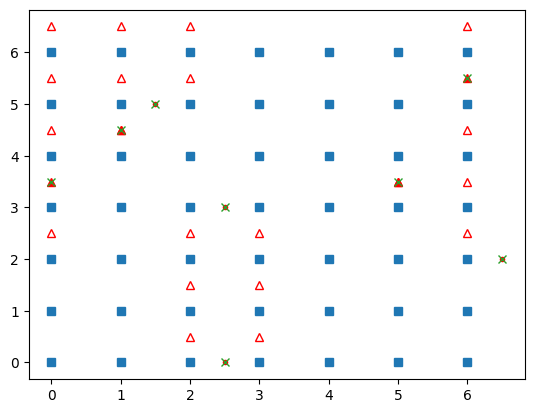

In [365]:
p_err =  0.1
q_err = 0.12
weights = np.ones(num_q_spacetime) * np.log((1-p_err)/p_err)
matching_x = Matching(Smat_spacetime,spacelike_weights=weights)

for i_y in range(dy):
    for i_x in range(dx):
        plt.plot(i_x,i_y, "s", color = "C0")

repetitions = dy
noise_new = (np.random.rand(dx, repetitions) < p_err).astype(np.uint8)
noise_cumulative = (np.cumsum(noise_new, 1) % 2).astype(np.uint8)
noise_total = noise_cumulative[:,-1]
syndrome = Smat@noise_cumulative % 2
# err_inst = np.random.rand(num_q)
err_idx = np.argwhere(noise_new>0 )
# # print(err_idx)
msize = 3
for q in err_idx:
    plt.plot(qubit_coords[q[0]][0],q[1],"ro",markersize=msize)

syndrome_error = (np.random.rand(dx, repetitions) < q_err ).astype(np.uint8)
syndrome_error[:,-1] = 0 # Perfect measurements in last round to ensure even parity
synd_err_idx = np.argwhere(syndrome_error >0 )
# # print(synd_idx)
for q in synd_err_idx:
    plt.plot(q[0], q[1]+0.5,"r^")

noisy_syndrome = (syndrome + syndrome_error) % 2
synd_idx = np.argwhere(noisy_syndrome >0 )
# # print(synd_idx)
for q in synd_idx:
    plt.plot(q[0], q[1]+0.5,"r^", markerfacecolor="None")

# # Convert to difference syndrome
noisy_syndrome[:,1:] = (noisy_syndrome[:,1:] - noisy_syndrome[:,0:-1]) % 2
synd_idx = np.argwhere(noisy_syndrome >0 )
# print(synd_idx)
# for q in synd_idx:
#     plt.plot(q[0], q[1],"rx")


recovery_x = matching_x.decode(noisy_syndrome)

# print(err_idx)
idx_recovery = np.argwhere(recovery_x>0)[:,0]
for q in idx_recovery:
    plt.plot(qubit_coords_spacetime[q][0],qubit_coords_spacetime[q][1],"x", color="C2")

# print(idx_recovery)


# Missing stabilizers

In [369]:
def compute_eff_Sx(Sx,loss_inds,remain_inds):
    G_loss = nx.Graph()
    for loss_index in loss_inds:
        s_inds = np.argwhere(Sx[:,loss_index]>0)[:,0]
        # if len(s_inds)>1:
        G_loss.add_edge(s_inds[0],s_inds[1])
        # else:
        #     G_loss.add_node(s_inds[0])

    components = [G_loss.subgraph(c).copy() for c in nx.connected_components(G_loss)]
    lost_vs = []
    for i_c, c in enumerate(components):
        lost_vs += c.nodes()

    num_s = Sx.shape[0]
    remain_vs = list(set(range(num_s)) - set(lost_vs))
    num_stab = len(components)+len(remain_vs)
    Sx_red2 = np.zeros((num_stab,len(remain_inds)))
    Sx_red2[len(components):,:] = Sx[np.ix_(remain_vs,remain_inds)]
    for i_c, c in enumerate(components):
        Sx_red2[i_c,:] = np.sum(Sx[np.ix_(c.nodes(),remain_inds)],axis = 0)%2

    keep_cols = np.argwhere(np.sum(Sx_red2,axis=0)>0)[:,0]
    Sx_red2 = Sx_red2[:,keep_cols]
    qubits_to_plot = remain_inds[keep_cols]

    return Sx_red2, qubits_to_plot

##################
def netx_Sx(Sx_red,overlap,qubits_to_plot):
    inds = np.argwhere(overlap>1)
    if len(inds)>0:
        rep_edges = []
        for i_v in inds:
            if i_v[1]>i_v[0]:
                if not (i_v[0] in rep_edges):
                    rep_edges.append(i_v[0])
                if not (i_v[1] in rep_edges):
                    rep_edges.append(i_v[1])

        rep_edges = np.sort(rep_edges).astype(int)
        not_rep_qubits = np.array(list(set(range(np.size(Sx_red,1))) - set(rep_edges)))
        num_not_rep = len(not_rep_qubits)

        ql2 = []
        nl2 = []
        nl_x2 = []
        nl_y2 = []
        counter = 0
        i = 0 
        overlap2 = overlap[np.ix_(rep_edges,rep_edges)]
        inds_to_keep2 = list(range(len(rep_edges)))
        while counter < len(rep_edges):
            edge = inds_to_keep2[i]
            ovlp_inds = np.argwhere(overlap2[edge,inds_to_keep2[i+1:]]==2)
            if qubits_to_plot[rep_edges[edge]] %l ==0:
                nl_i_x = 1
                nl_i_y = 0 
            else:
                nl_i_x = 0 
                nl_i_y = 1
            nl_i = len(ovlp_inds)+1

            qlist = qubits_to_plot[rep_edges[np.ix_([ inds_to_keep2[k] for k in i+1+ovlp_inds[:,0]])]]
            ovlp_inds_x = np.argwhere(qlist %l==0)
            ovlp_inds_y = np.argwhere(qlist %l >0)
            nl_i_x += len(ovlp_inds_x)
            nl_i_y += len(ovlp_inds_y)
            for j in ovlp_inds[::-1,0]:
                inds_to_keep2.remove(inds_to_keep2[i+1+j])
            ql2.append(np.concatenate(([qubits_to_plot[rep_edges[edge]]],qlist)))
            counter += nl_i
            nl2.append(nl_i)
            nl_x2.append(nl_i_x)
            nl_y2.append(nl_i_y)
            i += 1

        num_rep = len(inds_to_keep2)
        nl_x_tot = np.zeros(num_rep+num_not_rep)
        nl_x_tot[ np.argwhere(qubits_to_plot[not_rep_qubits]%l ==0)  ] = 1 
        nl_x_tot[len(not_rep_qubits):] = nl_x2

        nl_y_tot = np.zeros(num_rep+num_not_rep)
        nl_y_tot[ np.argwhere(qubits_to_plot[not_rep_qubits]%l >0)  ] = 1 
        nl_y_tot[num_not_rep:] = nl_y2

        nl_tot = np.concatenate((np.ones(num_not_rep),nl2))

        inds_to_keep2 = rep_edges[inds_to_keep2]
        comb_inds = np.concatenate((not_rep_qubits,inds_to_keep2))
        inds_sorted = np.argsort(comb_inds)
        inds_to_keep2 = comb_inds[inds_sorted]
        nl_x_tot = nl_x_tot[inds_sorted]
        nl_y_tot = nl_y_tot[inds_sorted]
        nl_tot = nl_tot[inds_sorted]
        remain_qubits = qubits_to_plot[inds_to_keep2]
        # Sx_red_netx = Sx_red[:,inds_to_keep]

        ql_tot = []
        rep_count = 0
        for i in inds_sorted:
            if i< num_not_rep:
                ql_tot.append([qubits_to_plot[not_rep_qubits[i]]])
            else:
                ql_tot.append(ql2[rep_count][:])
                rep_count += 1

    else:
        num_qubits = len(qubits_to_plot)
        remain_qubits = qubits_to_plot
        inds_to_keep_2 = list(range(num_qubits))
        
        ql_tot = qubits_to_plot#[]
        # for i in range(num_qubits):
        #     if i< num_not_rep:
        #         ql_tot.append([qubits_to_plot[i]])

        nl_x_tot = np.zeros(num_qubits)
        nl_x_tot[ np.argwhere(qubits_to_plot%l ==0)  ] = 1 

        nl_y_tot = np.zeros(num_qubits)
        nl_y_tot[ np.argwhere(qubits_to_plot%l >0)  ] = 1 

    return remain_qubits, inds_to_keep2, ql_tot, nl_x_tot, nl_y_tot
##################

1.0 0.0


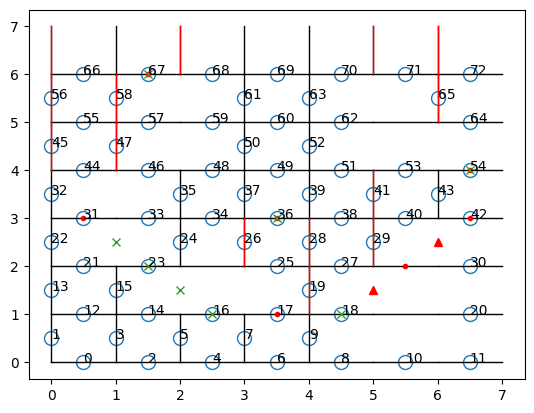

In [426]:
l = 2
repetitions = dy
prob_l = 0.3
error_loss = np.random.rand(dx, repetitions)
error_loss[:,-1] = 1
loss_inds_2d = np.argwhere(error_loss < prob_l)
remain_inds_2d = np.argwhere(error_loss >= prob_l)
# print(loss_inds)
loss_inds = np.array([qubit_idx_spacetime[f"({coords[0]}, {coords[1]+0.5})"] for coords in loss_inds_2d])
remain_inds = np.array(list( set(range(num_q_spacetime)) - set(loss_inds)))

# print(loss_inds)
# loss_coords = [qubit_coords_spacetime[q] for q in loss_inds]
# plotter(loss_coords, color="C0")
# remain_coords = [qubit_coords_spacetime[q] for q in remain_inds]
# plotter(remain_coords, color="C0")

Sx_red, qubits_to_plot = compute_eff_Sx(Smat_spacetime,loss_inds,remain_inds)

# remain_coords = [qubit_coords_spacetime[q] for q in qubits_to_plot]
# plotter(remain_coords, color="C0")

overlap = Sx_red.T@Sx_red
remain_qubits, inds_to_keep, ql, nl_x, nl_y = netx_Sx(Sx_red,overlap,qubits_to_plot)
# print(nl_x, nl_y)
num_edge = len(remain_qubits) 

remain_coords = [qubit_coords_spacetime[q] for q in remain_qubits]
plotter(remain_coords, color="C0")

############## error syndrome calculations ######
p_err =  0.12
q_err = 0.05

pl = (1-(1-2*p_err)**nl_x * (1-2*q_err)**nl_y)/2

weights = np.zeros(l*dx*dy)
weights[remain_qubits] = np.log((1-pl)/pl) 

inds_to_keep_2 = list(range(np.size(Sx_red,1)))
for i in range(num_edge):
    edge = inds_to_keep[i]
    ovlp_inds = np.argwhere(overlap[edge,inds_to_keep_2[i+1:]]==2)
    if len(ovlp_inds)>0:
        for j in ovlp_inds[::-1,0]:
            weights[qubits_to_plot[inds_to_keep_2[i+1+j]]] = weights[qubits_to_plot[edge]]

assert len(np.argwhere(weights>0))== len(qubits_to_plot)

if num_edge > 1:
    matching_x = Matching(Smat_spacetime,spacelike_weights=weights)
else:
    print("percolate")

# weights = np.ones(num_q_spacetime) * np.log((1-p_err)/p_err)
# matching_x = Matching(Smat_spacetime,spacelike_weights=weights)

# for i_y in range(dy):
#     for i_x in range(dx):
#         plt.plot(i_x,i_y, "s", color = "C0")

repetitions = dy
noise_new = (np.random.rand(dx, repetitions) < p_err).astype(np.uint8)
noise_cumulative = (np.cumsum(noise_new, 1) % 2).astype(np.uint8)
noise_total = noise_cumulative[:,-1]
syndrome = Smat@noise_cumulative % 2
# err_inst = np.random.rand(num_q)
err_idx = np.argwhere(noise_new>0 )
# # print(err_idx)
## draw data qubit links
for qx in range(dx):
    for qy in range(repetitions):
        plt.plot([qx,qx+1], [qy]*2,"k",linewidth=1)
msize = 3
for q in err_idx:
    plt.plot(qubit_coords[q[0]][0],q[1],"ro",markersize=msize)

syndrome_error = (np.random.rand(dx, repetitions) < q_err ).astype(np.uint8)
syndrome_error[:,-1] = 0 # Perfect measurements in last round to ensure even parity
synd_err_idx = np.argwhere(syndrome_error >0 )
# # print(synd_idx)
for q in synd_err_idx:
    plt.plot(q[0], q[1]+0.5,"r^")

## draw syndrome links
for qx in range(dx):
    for qy in range(repetitions):
        if [qx,qy] in remain_inds_2d.tolist():
            plt.plot([qx]*2, [qy,qy+1],"k",linewidth=1)

noisy_syndrome = (syndrome + syndrome_error) % 2
synd_idx = np.argwhere(noisy_syndrome >0 )
# # print(synd_idx)
for q in synd_idx:
    if q.tolist() in remain_inds_2d.tolist():
        # plt.plot(q[0], q[1]+0.5,"r^", markerfacecolor="None")
        plt.plot([q[0]]*2, [q[1],q[1]+1],"r",linewidth=1)

# # Convert to difference syndrome
noisy_syndrome[:,1:] = (noisy_syndrome[:,1:] - noisy_syndrome[:,0:-1]) % 2
synd_idx = np.argwhere(noisy_syndrome >0 )
# print(synd_idx)
# for q in synd_idx:
#     plt.plot(q[0], q[1],"rx")


recovery_x = matching_x.decode(noisy_syndrome)

# print(err_idx)
idx_recovery = np.argwhere(recovery_x>0)[:,0]
for q in idx_recovery:
    plt.plot(qubit_coords_spacetime[q][0],qubit_coords_spacetime[q][1],"x", color="C2")

# print(idx_recovery)
    
recovery_tot = np.zeros(dx)
for i_y in range(dy):
    recovery_tot += recovery_x[2*i_y*dx:2*(i_y+1)*dx:2]
recovery_tot %= 2

logicals = np.ones(dx)
predicted_logicals_flipped = recovery_tot@logicals.T % 2
actual_logicals_flipped = noise_total@logicals.T % 2
print(actual_logicals_flipped, predicted_logicals_flipped)


In [403]:
a = np.zeros(4)
a[0::2] = 1
print(a)

[1. 0. 1. 0.]


In [364]:
print(loss_inds.tolist())
# print(q.tolist())
# q.tolist() in loss_inds.tolist()

[35, 23, 41]


In [44]:
def rep_code(d):

    qubit_coords = []
    i_y = 0
    for i_x in range(d):
        qubit_coords.append( ( i_x + 0.5, i_y ) )

    qubit_idx = {}
    for idx, coords in enumerate(qubit_coords):
        qubit_idx[f"{coords}"] = idx

    # plotter(qubit_coords, color="C0")
    num_q = len(qubit_coords)
    num_s = d
    s_idx = 0
    Smat = np.zeros(( num_s, num_q))
    Smat_idx = {}
    i_y = 0
    for i_x in range(d):
        Smat_idx[f"({i_x}, {i_y})"] = s_idx
        qvec = [( i_x + 0.5 , i_y), ( (i_x - 0.5)%d, i_y)]
        # smat.append(qvec)
        for q in qvec:
            Smat[s_idx, qubit_idx[f"{q}"]] = 1
            
        s_idx += 1

    return Smat

In [23]:
# p_bulk_qubit = 0.05
p_bdy_qubit = 0.1
# p_qubit_list = np.ones(num_q) * p_bulk_qubit
# p_qubit_list[qubit_bdy] = p_bdy_qubit

harmonic = lambda k: (1/np.arange(1,k+1)).sum()
bandwidth = 4

p_bulk_s = 0.01
p_bdy_s = 0.02

dist_list = [4,6,8]
gen_coh_ratio_list = np.logspace(-3,-1,8)
Niter = 30000
num_errors = np.zeros((len(dist_list),len(gen_coh_ratio_list)))
for i_d, d in enumerate(dist_list):
    # print(d)

    tic = time.time()
    Smat, logicals, bdy = surface_code(d)
    num_s, num_q = Smat.shape
    qubit_bdy, S_bdy = bdy
    p_s_list = np.ones(num_s) * p_bulk_s
    p_s_list[S_bdy] = p_bdy_s

    repetitions = d

    for i_t, ratio in enumerate(gen_coh_ratio_list):
        # print(i_t)
        
        if d > bandwidth:
            idle_time = ((d // bandwidth) * harmonic(bandwidth)  + harmonic (d % bandwidth)  )* ratio
        else:
            idle_time = harmonic(d)* ratio
        p_bulk_qubit = 1 - np.exp(- idle_time )
        p_qubit_list = np.ones(num_q) * p_bulk_qubit
        p_qubit_list[qubit_bdy] = (p_bulk_qubit+ p_bdy_qubit)

        matching = Matching(Smat, spacelike_weights=np.log((1-p_qubit_list)/p_qubit_list),
                        repetitions=repetitions, timelike_weights=np.log((1-p_s_list)/p_s_list), faults_matrix=logicals)
        for _ in range(Niter):
            noise_new = (np.random.rand(num_q, repetitions) < np.reshape(p_qubit_list,(p_qubit_list.shape[0],1))).astype(np.uint8)
            noise_cumulative = (np.cumsum(noise_new, 1) % 2).astype(np.uint8)
            noise_total = noise_cumulative[:,-1]
            syndrome = Smat@noise_cumulative % 2
            syndrome_error = (np.random.rand(num_s, repetitions) < np.reshape(p_s_list,(p_s_list.shape[0],1)) ).astype(np.uint8)
            syndrome_error[:,-1] = 0 # Perfect measurements in last round to ensure even parity
            noisy_syndrome = (syndrome + syndrome_error) % 2
            # Convert to difference syndrome
            noisy_syndrome[:,1:] = (noisy_syndrome[:,1:] - noisy_syndrome[:,0:-1]) % 2
            # recovery_chain = matching.decode(noisy_syndrome)
            # print(num_q, num_s, recovery_chain.shape)
            predicted_logicals_flipped = matching.decode(noisy_syndrome)[0]
            actual_logicals_flipped = noise_total@logicals.T % 2
            num_errors[i_d,i_t] += not (predicted_logicals_flipped == actual_logicals_flipped)
    toc = time.time()
    print(f"d={d}, Time elapsed: {toc-tic:.2f} secs")
num_errors /= Niter
# print(num_errors)
# print(predicted_logicals_flipped, actual_logicals_flipped)

d=4, Time elapsed: 18.57 secs
d=6, Time elapsed: 38.05 secs
d=8, Time elapsed: 81.22 secs


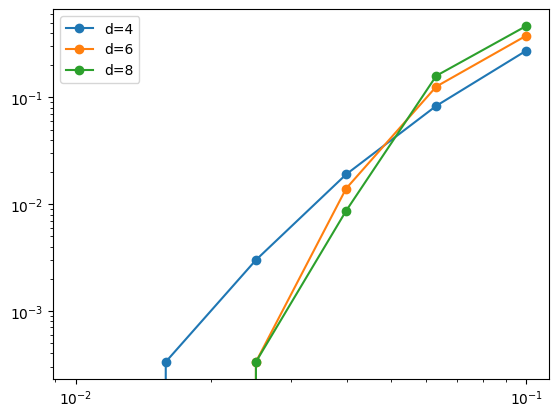

In [18]:
for i_d, d in enumerate(dist_list):
    plt.plot(gen_coh_ratio_list,num_errors[i_d,:],"o-",label=f"d={d}")
plt.legend()
plt.xscale("log")
plt.yscale("log")

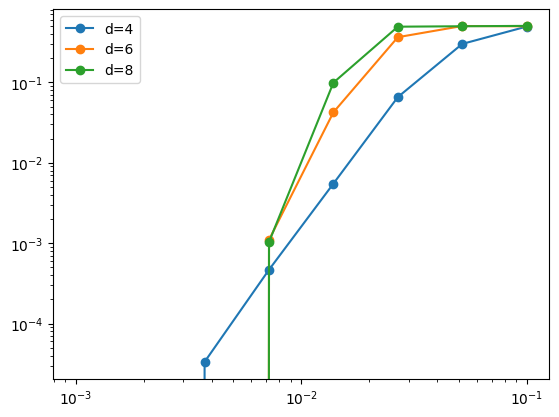

In [24]:
for i_d, d in enumerate(dist_list):
    plt.plot(gen_coh_ratio_list,num_errors[i_d,:],"o-",label=f"d={d}")
plt.legend()
plt.xscale("log")
plt.yscale("log")

In [48]:
a = np.random.rand(num_q, repetitions) 
print(a)
print(p_qubit_list)
print( (a<np.reshape(p_qubit_list,(p_qubit_list.shape[0],1))).astype(np.uint8) )


[[0.21586359 0.25375241]
 [0.73397014 0.38690216]
 [0.41792933 0.48780607]
 [0.48134557 0.0506389 ]
 [0.22758958 0.10321007]
 [0.9523039  0.48254653]
 [0.77519422 0.89555984]
 [0.97484912 0.11281504]
 [0.92423149 0.81562444]
 [0.03638088 0.20432852]
 [0.23328203 0.2187781 ]]
[0.1 0.1 0.1 0.1 0.5 0.1 0.1 0.1 0.1 0.1 0.1]
[[0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]]
